<a href="https://colab.research.google.com/github/tanyadas18/DataScience-Projects/blob/main/AI_GENERATED_VS_REAL_IMAGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI GENERATED VS REAL IMAGES

In [3]:
from google.colab import files
files.upload()  # Manually select kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanyadas","key":"8abbcfcf2dca4dfdb90e6c92b215324a"}'}

In [4]:
import shutil
import os

# Move kaggle.json to the hidden .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d alessandrasala79/ai-vs-human-generated-dataset

Dataset URL: https://www.kaggle.com/datasets/alessandrasala79/ai-vs-human-generated-dataset
License(s): apache-2.0
100% 9.75G/9.76G [02:02<00:00, 122MB/s]
100% 9.76G/9.76G [02:02<00:00, 85.2MB/s]


In [6]:
import zipfile

# Extract the ZIP file
zip_path = "/content/ai-vs-human-generated-dataset.zip"  # Adjust the filename if needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check extracted folders
import os
print("Extracted folders:", os.listdir("/content/"))

Extracted folders: ['.config', 'ai-vs-human-generated-dataset.zip', 'train_data', 'train.csv', 'test_data_v2', 'test.csv', 'sample_data']


In [7]:
# Define dataset paths
train_data_folder = "/content/train_data"
test_data_folder = "/content/test_data_v2"

# Verify extracted folders
print("Train Data Files:", os.listdir(train_data_folder)[:5])
print("Test Data Files:", os.listdir(test_data_folder)[:5])

Train Data Files: ['d91559a9915743fcad5ac7db50ce8a49.jpg', 'd6acc248a5b84ef690312251b30c34cc.jpg', '098cd6411edf4d74b02536eb55345bdb.jpg', 'c581d5dcc844485facd4731d978a5a45.jpg', '670e121665ea45dcadf634b25346df9f.jpg']
Test Data Files: ['18689479d27e4067bca2b9de8a3f0292.jpg', 'f3925f736ff04bc1922f6f738d0fdc57.jpg', '635259eeb32148d582282774bc630f22.jpg', '29faf8ef5f0342bd81837a3ea9aad7d0.jpg', '41085100254046c6a9b79f3bf584a3b1.jpg']


In [8]:
train_csv_path = "/content/train.csv"
test_csv_path = "/content/test.csv"

import pandas as pd

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Fix image paths
train_df['file_name'] = train_df['file_name'].apply(lambda x: os.path.join(train_data_folder, os.path.basename(x)))
test_df['id'] = test_df['id'].apply(lambda x: os.path.join(test_data_folder, os.path.basename(x)))

print(train_df.head())
print(test_df.head())

   Unnamed: 0                                          file_name  label
0           0  /content/train_data/a6dcb93f596a43249135678dfc...      1
1           1  /content/train_data/041be3153810433ab146bc97d5...      0
2           2  /content/train_data/615df26ce9494e5db2f70e57ce...      1
3           3  /content/train_data/8542fe161d9147be8e835e50c0...      0
4           4  /content/train_data/5d81fa12bc3b4cea8c94a6700a...      1
                                                  id
0  /content/test_data_v2/1a2d9fd3e21b4266aea1f66b...
1  /content/test_data_v2/ab5df8f441fe4fbf9dc9c6ba...
2  /content/test_data_v2/eb364dd2dfe34feda0e52466...
3  /content/test_data_v2/f76c2580e9644d85a741a42c...
4  /content/test_data_v2/a16495c578b7494683805484...


In [2]:
import pandas as pd
import os

# Define dataset paths
train_csv_path = "/content/train.csv"  # Update path if needed
test_csv_path = "/content/test.csv"
train_data_folder = "/content/train_data"
test_data_folder = "/content/test_data_v2"

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Fix image paths
train_df['file_name'] = train_df['file_name'].apply(lambda x: os.path.join(train_data_folder, os.path.basename(x)))
test_df['id'] = test_df['id'].apply(lambda x: os.path.join(test_data_folder, os.path.basename(x)))

print("Train Data:\n", train_df.head())
print("Test Data:\n", test_df.head())

Train Data:
    Unnamed: 0                                          file_name  label
0           0  /content/train_data/a6dcb93f596a43249135678dfc...      1
1           1  /content/train_data/041be3153810433ab146bc97d5...      0
2           2  /content/train_data/615df26ce9494e5db2f70e57ce...      1
3           3  /content/train_data/8542fe161d9147be8e835e50c0...      0
4           4  /content/train_data/5d81fa12bc3b4cea8c94a6700a...      1
Test Data:
                                                   id
0  /content/test_data_v2/1a2d9fd3e21b4266aea1f66b...
1  /content/test_data_v2/ab5df8f441fe4fbf9dc9c6ba...
2  /content/test_data_v2/eb364dd2dfe34feda0e52466...
3  /content/test_data_v2/f76c2580e9644d85a741a42c...
4  /content/test_data_v2/a16495c578b7494683805484...


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Convert labels from integers (0, 1) to strings ("0", "1")
train_df["label"] = train_df["label"].astype(str)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMG_SIZE = (128, 128)
BATCH_SIZE = 32  # Adjust batch size based on memory availability

# Convert integer labels (0,1) to strings ("0","1") to prevent TypeError
train_df["label"] = train_df["label"].astype(str)

# Create ImageDataGenerator for training (data augmentation included)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting 80% Train / 20% Validation
)

# Create Data Generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/train_data",  # Path to images
    x_col="file_name",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  # This expects string labels, not integers
    subset="training"
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/train_data",
    x_col="file_name",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification (AI vs. Human)
])

# Compile Model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the Model Using Data Generators
EPOCHS = 5  # Start with 5, increase if needed
history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1945s 971ms/step - accuracy: 0.8383 - loss: 0.4440 - val_accuracy: 0.9250 - val_loss: 0.2094
Epoch 2/5
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1959s 950ms/step - accuracy: 0.9214 - loss: 0.2105 - val_accuracy: 0.9282 - val_loss: 0.2033
Epoch 3/5
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1835s 918ms/step - accuracy: 0.9321 - loss: 0.1782 - val_accuracy: 0.9355 - val_loss: 0.1811
Epoch 4/5
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1865s 933ms/step - accuracy: 0.9426 - loss: 0.1478 - val_accuracy: 0.9406 - val_loss: 0.1725
Epoch 5/5
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1870s 935ms/step - accuracy: 0.9577 - loss: 0.1101 - val_accuracy: 0.9351 - val_loss: 0.1993


In [10]:
# Evaluate model performance
val_loss, val_accuracy = cnn_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 137s 274ms/step - accuracy: 0.9360 - loss: 0.1986
Validation Accuracy: 0.94


In [11]:
# Save trained model
cnn_model.save("cnn_ai_vs_human.h5")

# Load model later if needed
from tensorflow.keras.models import load_model
loaded_model = load_model("cnn_ai_vs_human.h5")

In [12]:
# Generate predictions on test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="/content/test_data_v2",
    x_col="id",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # No labels for test data
    shuffle=False
)

# Predict labels for test images
test_predictions_prob = cnn_model.predict(test_generator)
test_predictions = (test_predictions_prob > 0.5).astype(int).flatten()  # Convert probabilities to 0/1

# Save predictions to CSV
test_df['prediction'] = test_predictions
test_df[['id', 'prediction']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

Found 5540 validated image filenames.
174/174 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step
Predictions saved to test_predictions.csv


In [16]:
import pandas as pd

# Load the predictions file
predictions_df = pd.read_csv("test_predictions.csv")

# Display first few rows
print(predictions_df.head())

                                                  id  prediction
0  /content/test_data_v2/1a2d9fd3e21b4266aea1f66b...           0
1  /content/test_data_v2/ab5df8f441fe4fbf9dc9c6ba...           0
2  /content/test_data_v2/eb364dd2dfe34feda0e52466...           0
3  /content/test_data_v2/f76c2580e9644d85a741a42c...           0
4  /content/test_data_v2/a16495c578b7494683805484...           0


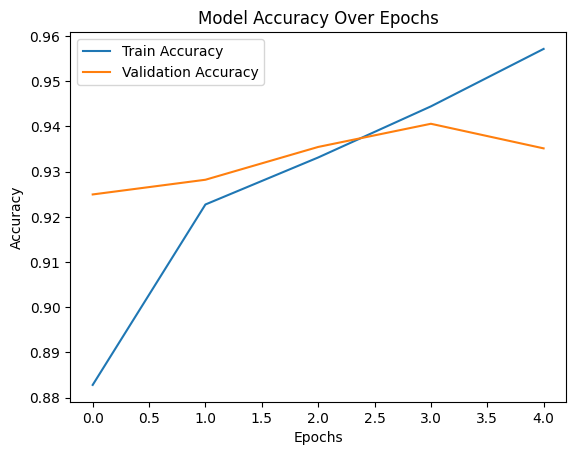

In [22]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

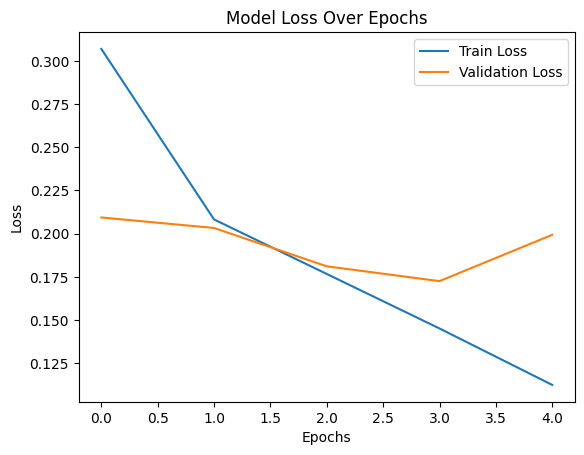

In [23]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 303ms/step


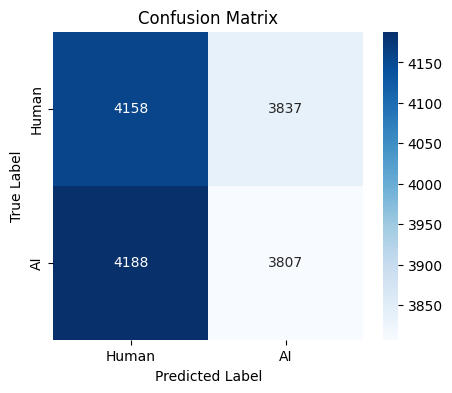

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get Predictions
y_true = val_generator.classes
y_pred_probs = cnn_model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


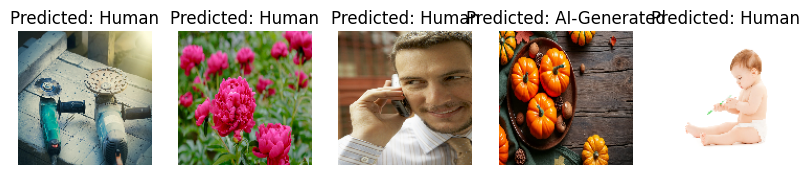

In [33]:
import random

# Get random test samples
sample_images = random.sample(list(test_df["id"]), 5)

plt.figure(figsize=(10, 5))

for i, img_path in enumerate(sample_images):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Get model prediction
    prediction_prob = cnn_model.predict(img_array)[0][0]
    label = "AI-Generated" if prediction_prob > 0.5 else "Human"

    # Plot image
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis("off")

plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_style("whitegrid")

In [44]:
from google.colab import files

uploaded_files = files.upload()  # Manually select an AI image & a Human image

Saving GEN2.jpg to GEN2.jpg


In [41]:
from google.colab import files

uploaded_files = files.upload()  # Manually select an AI image & a Human image

Saving HMN2.jpg to HMN2.jpg


In [45]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to uploaded images (Update these after uploading)
new_ai_image_path = "/content/GEN2.jpg"  # Change filename
new_human_image_path = "/content/HMN2.jpg"  # Change filename

# Function to preprocess images
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0  # Normalize pixel values
    return np.expand_dims(image, axis=0)

# Preprocess new images
new_ai_image = preprocess_image(new_ai_image_path)
new_human_image = preprocess_image(new_human_image_path)

# Get predictions
new_ai_pred = cnn_model.predict(new_ai_image)[0][0]
new_human_pred = cnn_model.predict(new_human_image)[0][0]

# Convert predictions to probabilities
ai_prob = f"{new_ai_pred:.2%} AI-Generated"
human_prob = f"{new_human_pred:.2%} Human"

# Show results
print("New AI Image Prediction:", ai_prob)
print("New Human Image Prediction:", human_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
New AI Image Prediction: 1.20% AI-Generated
New Human Image Prediction: 2.75% Human


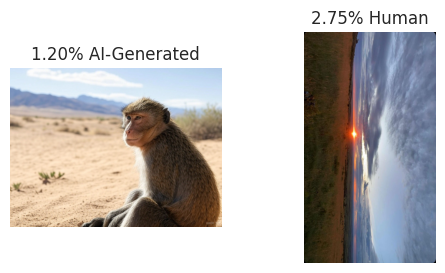

In [46]:
import matplotlib.pyplot as plt

# Show uploaded images with model predictions
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(load_img(new_ai_image_path))
plt.title(ai_prob)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(load_img(new_human_image_path))
plt.title(human_prob)
plt.axis("off")

plt.show()

In [47]:
from google.colab import files

uploaded_files = files.upload()  # Manually select an AI image & a Human image

Saving GEN3.jpg to GEN3.jpg


In [48]:
from google.colab import files

uploaded_files = files.upload()  # Manually select an AI image & a Human image

Saving HMN3.jpg to HMN3.jpg


In [52]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to uploaded images (Update these after uploading)
new_ai_image_path = "/content/GEN3.jpg"  # Change filename
new_human_image_path = "/content/HMN3.jpg"  # Change filename

# Function to preprocess images
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0  # Normalize pixel values
    return np.expand_dims(image, axis=0)

# Preprocess new images
new_ai_image = preprocess_image(new_ai_image_path)
new_human_image = preprocess_image(new_human_image_path)

# Get predictions
new_ai_pred = cnn_model.predict(new_ai_image)[0][0]
new_human_pred = cnn_model.predict(new_human_image)[0][0]

# Convert predictions to probabilities
ai_prob = f"{new_ai_pred:.2%} AI-Generated"
human_prob = f"{new_human_pred:.2%} Human"

# Show results
print("New AI Image Prediction:", ai_prob)
print("New Human Image Prediction:", human_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
New AI Image Prediction: 2.38% AI-Generated
New Human Image Prediction: 0.28% Human


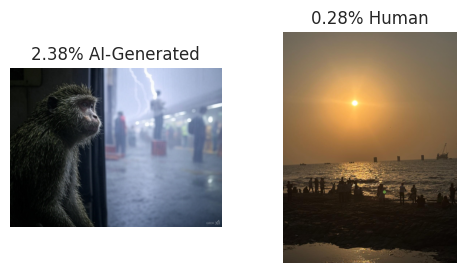

In [53]:
import matplotlib.pyplot as plt

# Show uploaded images with model predictions
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(load_img(new_ai_image_path))
plt.title(ai_prob)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(load_img(new_human_image_path))
plt.title(human_prob)
plt.axis("off")

plt.show()